In [1]:
import xarray as xr
import os
import glob

In [2]:
path = 'home/ms86336/Downloads/paris/washington/'

Processing file: /home/ms86336/Downloads/paris/washington/graphcast_2021_05_20_washington_36hr.nc
<xarray.Dataset> Size: 9kB
Dimensions:  (time: 7, lat: 9, lon: 9)
Coordinates:
  * lat      (lat) float64 72B 39.0 39.25 39.5 39.75 40.0 40.25 40.5 40.75 41.0
  * lon      (lon) float64 72B -78.0 -77.75 -77.5 -77.25 ... -76.5 -76.25 -76.0
  * time     (time) datetime64[ns] 56B 2021-05-20 ... 2021-05-21T12:00:00
Data variables:
    u10m     (time, lat, lon) float32 2kB ...
    v10m     (time, lat, lon) float32 2kB ...
    t2m      (time, lat, lon) float32 2kB ...
    tp06     (time, lat, lon) float32 2kB ...
<xarray.Dataset> Size: 17MB
Dimensions:              (latitude: 240, longitude: 240, time: 37)
Coordinates:
  * latitude             (latitude) float64 2kB 39.01 39.02 39.02 ... 40.99 41.0
  * longitude            (longitude) float64 2kB -77.99 -77.99 ... -76.01 -76.0
  * time                 (time) datetime64[ns] 296B 2021-05-20 ... 2021-05-21...
Data variables:
    VGRD_10maboveground

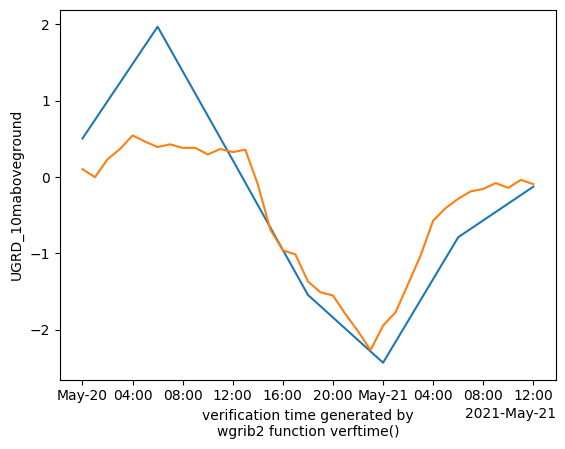

In [3]:
# Define the path and the pattern
path = '/home/ms86336/Downloads/paris/washington/'  # Ensure the path is absolute
pattern = 'graphcast_????_??_??_washington_36hr.nc'

# Construct the full pattern
full_pattern = os.path.join(path, pattern)

# # Debug print to check the full pattern
# print(f'Full pattern: {full_pattern}')

# Use glob to find all files matching the pattern
matching_files = glob.glob(full_pattern)

# # Debug print to check the matching files
# print(f'Matching files: {matching_files}')

# Loop through the matching files
for file_path in matching_files:
    if os.path.exists(file_path):
        # Perform operations on the file
        print(f'Processing file: {file_path}')
        ds_gc = xr.open_dataset(file_path).isel(history=0)
        ds_gc['lon'] = ds_gc['lon'] - 360
        # print(ds_gc)
        start_time = ds_gc.time.values[0]
        # print(start_time)
        end_time = ds_gc.time.values[-1]
        # print(end_time)
        # Add your code here to process each file
        ds_aorc_apcp = xr.open_dataset('/home/ms86336/Downloads/paris/noaa_aorc_washington_APCP_surface_2017_2023.nc').sel(time=slice(start_time, end_time))
        ds_aorc_t2m   = xr.open_dataset('/home/ms86336/Downloads/paris/noaa_aorc_washington_TMP_2maboveground_2017_2023.nc').sel(time=slice(start_time, end_time))
        ds_aorc_u10  = xr.open_dataset('/home/ms86336/Downloads/paris/noaa_aorc_washington_UGRD_10maboveground_2017_2023.nc').sel(time=slice(start_time, end_time))
        ds_aorc_v10  = xr.open_dataset('/home/ms86336/Downloads/paris/noaa_aorc_washington_VGRD_10maboveground_2017_2023.nc').sel(time=slice(start_time, end_time))
        print(ds_gc)
        print(ds_aorc_v10)
        #ds_gc.u10m.mean(dim='time').plot()
        ds_gc.u10m.mean(dim='lat').mean(dim='lon').plot()
        ds_aorc_u10.UGRD_10maboveground.mean(dim='latitude').mean(dim='longitude').plot()
        # print(ds_aorc.time.values[0])
        break
    else:
        print(f'File not found: {file_path}')

In [4]:
import os
import glob
import xarray as xr

# Define the path and the pattern
path = '/home/ms86336/Downloads/paris/washington/'  # Ensure the path is absolute
pattern = 'graphcast_????_??_??_washington_36hr.nc'

# Construct the full pattern
full_pattern = os.path.join(path, pattern)

# Use glob to find all files matching the pattern
matching_files = glob.glob(full_pattern)

# Initialize min and max values for input and target
global_min_input = {'u10m': float('inf'), 'v10m': float('inf'), 't2m': float('inf'), 'tp06': float('inf')}
global_max_input = {'u10m': float('-inf'), 'v10m': float('-inf'), 't2m': float('-inf'), 'tp06': float('-inf')}
global_min_target = {'APCP_surface': float('inf'), 'TMP_2maboveground': float('inf'), 'UGRD_10maboveground': float('inf'), 'VGRD_10maboveground': float('inf')}
global_max_target = {'APCP_surface': float('-inf'), 'TMP_2maboveground': float('-inf'), 'UGRD_10maboveground': float('-inf'), 'VGRD_10maboveground': float('-inf')}


In [5]:
# Loop through the matching files to find global min and max
for file_path in matching_files:
    try:
        if os.path.exists(file_path):
            ds_gc = xr.open_dataset(file_path).isel(history=0)
            ds_gc['lon'] = ds_gc['lon'] - 360
            
            start_time = ds_gc.time.values[0]
            end_time = ds_gc.time.values[-1]

            
            # Update global min and max for input data
            for var in global_min_input.keys():
                global_min_input[var] = min(global_min_input[var], ds_gc[var].min().item())
                global_max_input[var] = max(global_max_input[var], ds_gc[var].max().item())

    except:
        continue
print(f'Global min values for input: {global_min_input}')
print(f'Global max values for input: {global_max_input}')


Global min values for input: {'u10m': -11.2865629196167, 'v10m': -12.6307373046875, 't2m': 252.3680419921875, 'tp06': -0.00011615798575803638}
Global max values for input: {'u10m': 12.917617797851562, 'v10m': 12.816701889038086, 't2m': 308.9913024902344, 'tp06': 0.0838286280632019}


In [6]:
# Load the AORC datasets
ds_aorc_apcp = xr.open_dataset('/home/ms86336/Downloads/paris/noaa_aorc_washington_APCP_surface_2017_2023.nc')#.sel(time=slice(start_time, end_time))
ds_aorc_t2m   = xr.open_dataset('/home/ms86336/Downloads/paris/noaa_aorc_washington_TMP_2maboveground_2017_2023.nc')#.sel(time=slice(start_time, end_time))
ds_aorc_u10  = xr.open_dataset('/home/ms86336/Downloads/paris/noaa_aorc_washington_UGRD_10maboveground_2017_2023.nc')#.sel(time=slice(start_time, end_time))
ds_aorc_v10  = xr.open_dataset('/home/ms86336/Downloads/paris/noaa_aorc_washington_VGRD_10maboveground_2017_2023.nc')#.sel(time=slice(start_time, end_time))

# Update global min and max for target data
global_min_target['APCP_surface'] = min(global_min_target['APCP_surface'], ds_aorc_apcp['APCP_surface'].min().item())
global_max_target['APCP_surface'] = max(global_max_target['APCP_surface'], ds_aorc_apcp['APCP_surface'].max().item())
global_min_target['TMP_2maboveground'] = min(global_min_target['TMP_2maboveground'], ds_aorc_t2m['TMP_2maboveground'].min().item())
global_max_target['TMP_2maboveground'] = max(global_max_target['TMP_2maboveground'], ds_aorc_t2m['TMP_2maboveground'].max().item())
global_min_target['UGRD_10maboveground'] = min(global_min_target['UGRD_10maboveground'], ds_aorc_u10['UGRD_10maboveground'].min().item())
global_max_target['UGRD_10maboveground'] = max(global_max_target['UGRD_10maboveground'], ds_aorc_u10['UGRD_10maboveground'].max().item())
global_min_target['VGRD_10maboveground'] = min(global_min_target['VGRD_10maboveground'], ds_aorc_v10['VGRD_10maboveground'].min().item())
global_max_target['VGRD_10maboveground'] = max(global_max_target['VGRD_10maboveground'], ds_aorc_v10['VGRD_10maboveground'].max().item())


print(f'Global min values for target: {global_min_target}')
print(f'Global max values for target: {global_max_target}')


Global min values for target: {'APCP_surface': 0.0, 'TMP_2maboveground': 265.70000395923853, 'UGRD_10maboveground': -2.9000000432133675, 'VGRD_10maboveground': -9.80000014603138}
Global max values for target: {'APCP_surface': 0.5000000074505806, 'TMP_2maboveground': 278.90000415593386, 'UGRD_10maboveground': 11.500000171363354, 'VGRD_10maboveground': 4.6000000685453415}


In [7]:
import torch

# Function to perform min-max normalization with global min and max values
def min_max_normalize(data, global_min, global_max):
    return (data - global_min) / (global_max - global_min)

# Loop through the matching files again to normalize and save
for file_path in matching_files:
    if os.path.exists(file_path):
        try:
            # Perform operations on the file
            print(f'Processing file: {file_path}')
            ds_gc = xr.open_dataset(file_path).isel(history=0).isel(time=slice(1,7))
            ds_gc['lon'] = ds_gc['lon'] - 360
            
            start_time = ds_gc.time.values[0]
            end_time = ds_gc.time.values[-1]

            # Load the AORC datasets
            ds_aorc_apcp = xr.open_dataset('/home/ms86336/Downloads/paris/noaa_aorc_washington_APCP_surface_2017_2023.nc').sel(time=slice(start_time, end_time))
            ds_aorc_t2m   = xr.open_dataset('/home/ms86336/Downloads/paris/noaa_aorc_washington_TMP_2maboveground_2017_2023.nc').sel(time=slice(start_time, end_time))
            ds_aorc_u10  = xr.open_dataset('/home/ms86336/Downloads/paris/noaa_aorc_washington_UGRD_10maboveground_2017_2023.nc').sel(time=slice(start_time, end_time))
            ds_aorc_v10  = xr.open_dataset('/home/ms86336/Downloads/paris/noaa_aorc_washington_VGRD_10maboveground_2017_2023.nc').sel(time=slice(start_time, end_time))

            # Interpolate ds_gc to the grid of ds_aorc_apcp
            ds_gc_interp = ds_gc.interp(lat=ds_aorc_apcp.latitude, lon=ds_aorc_apcp.longitude)

            # Ensure the input variables are in the same shape
            input_data = xr.Dataset({
                'u10m': ds_gc_interp['u10m'],
                'v10m': ds_gc_interp['v10m'],
                't2m': ds_gc_interp['t2m'],
                'tp06': ds_gc_interp['tp06']
            })
            
            # Ensure the target variables are in the same shape
            target_data = xr.Dataset({
                'APCP_surface': ds_aorc_apcp['APCP_surface'],
                'TMP_2maboveground': ds_aorc_t2m['TMP_2maboveground'],
                'UGRD_10maboveground': ds_aorc_u10['UGRD_10maboveground'],
                'VGRD_10maboveground': ds_aorc_v10['VGRD_10maboveground']
            })

            # Perform min-max normalization using global min and max
            input_data_norm = xr.Dataset({var: min_max_normalize(input_data[var], global_min_input[var], global_max_input[var]) for var in input_data})
            target_data_norm = xr.Dataset({var: min_max_normalize(target_data[var], global_min_target[var], global_max_target[var]) for var in target_data})

            # Convert the input and target data to PyTorch tensors
            input_tensor = torch.tensor(input_data_norm.to_array().values)
            target_tensor = torch.tensor(target_data_norm.to_array().values)
            print('nans in input, nans in target, input.shape, target.shape ', torch.sum(torch.isnan(input_tensor)), torch.sum(torch.isnan(target_tensor)), input_tensor.shape, target_tensor.shape)
            # Define the output path for saving the .pt files
            input_output_path = os.path.join('/home/ms86336/Downloads/paris/training_data/', f'{os.path.basename(file_path).split(".")[0]}_input.pt')
            target_output_path = os.path.join('/home/ms86336/Downloads/paris/training_data/', f'{os.path.basename(file_path).split(".")[0]}_target.pt')
            
            # Save the tensors to .pt files
            torch.save(input_tensor, input_output_path)
            torch.save(target_tensor, target_output_path)
            print(f'Saved normalized input data to {input_output_path}')
            print(f'Saved normalized target data to {target_output_path}')

        except:
            continue

Processing file: /home/ms86336/Downloads/paris/washington/graphcast_2021_05_20_washington_36hr.nc
nans in input, nans in target, input.shape, target.shape  tensor(0) tensor(0) torch.Size([4, 6, 240, 240]) torch.Size([4, 31, 240, 240])
Saved normalized input data to /home/ms86336/Downloads/paris/training_data/graphcast_2021_05_20_washington_36hr_input.pt
Saved normalized target data to /home/ms86336/Downloads/paris/training_data/graphcast_2021_05_20_washington_36hr_target.pt
Processing file: /home/ms86336/Downloads/paris/washington/graphcast_2017_11_18_washington_36hr.nc
nans in input, nans in target, input.shape, target.shape  tensor(0) tensor(0) torch.Size([4, 6, 240, 240]) torch.Size([4, 31, 240, 240])
Saved normalized input data to /home/ms86336/Downloads/paris/training_data/graphcast_2017_11_18_washington_36hr_input.pt
Saved normalized target data to /home/ms86336/Downloads/paris/training_data/graphcast_2017_11_18_washington_36hr_target.pt
Processing file: /home/ms86336/Downloads/p

In [9]:
ds_gc.isel(time=slice(1,7))

<xarray.Dataset> Size: 7kB
Dimensions:  (time: 5, lat: 9, lon: 9)
Coordinates:
  * lat      (lat) float64 72B 39.0 39.25 39.5 39.75 40.0 40.25 40.5 40.75 41.0
  * lon      (lon) float64 72B -78.0 -77.75 -77.5 -77.25 ... -76.5 -76.25 -76.0
  * time     (time) datetime64[ns] 40B 2022-12-19T12:00:00 ... 2022-12-20T12:...
Data variables:
    u10m     (time, lat, lon) float32 2kB ...
    v10m     (time, lat, lon) float32 2kB ...
    t2m      (time, lat, lon) float32 2kB ...
    tp06     (time, lat, lon) float32 2kB ...

In [10]:
import numpy as np
np.sum(np.isnan(ds_gc.isel(time=slice(1,7)).tp06.values))

0

In [ ]:
import xarray as xr
ds = xr.open_dataset('/mnt/paris_outputs/to_write.nc')
ds

# Train only temperature to temperature

In [ ]:
import torch

# Function to perform min-max normalization with global min and max values
def min_max_normalize(data, global_min, global_max):
    return (data - global_min) / (global_max - global_min)

# Loop through the matching files again to normalize and save
for file_path in matching_files:
    if os.path.exists(file_path):
        try:
            # Perform operations on the file
            print(f'Processing file: {file_path}')
            ds_gc = xr.open_dataset(file_path).isel(history=0).isel(time=slice(1,7))
            ds_gc['lon'] = ds_gc['lon'] - 360
            
            start_time = ds_gc.time.values[0]
            end_time = ds_gc.time.values[-1]

            # Load the AORC datasets
            ds_aorc_apcp = xr.open_dataset('/home/ms86336/Downloads/paris/noaa_aorc_washington_APCP_surface_2017_2023.nc').sel(time=slice(start_time, end_time))
            ds_aorc_t2m   = xr.open_dataset('/home/ms86336/Downloads/paris/noaa_aorc_washington_TMP_2maboveground_2017_2023.nc').sel(time=slice(start_time, end_time))
            ds_aorc_u10  = xr.open_dataset('/home/ms86336/Downloads/paris/noaa_aorc_washington_UGRD_10maboveground_2017_2023.nc').sel(time=slice(start_time, end_time))
            ds_aorc_v10  = xr.open_dataset('/home/ms86336/Downloads/paris/noaa_aorc_washington_VGRD_10maboveground_2017_2023.nc').sel(time=slice(start_time, end_time))

            # Interpolate ds_gc to the grid of ds_aorc_apcp
            ds_gc_interp = ds_gc.interp(lat=ds_aorc_apcp.latitude, lon=ds_aorc_apcp.longitude)

            # Ensure the input variables are in the same shape
            input_data = xr.Dataset({
                # 'u10m': ds_gc_interp['u10m'],
                # 'v10m': ds_gc_interp['v10m'],
                't2m': ds_gc_interp['t2m'],
                # 'tp06': ds_gc_interp['tp06']
            })
            
            # Ensure the target variables are in the same shape
            target_data = xr.Dataset({
                # 'APCP_surface': ds_aorc_apcp['APCP_surface'],
                'TMP_2maboveground': ds_aorc_t2m['TMP_2maboveground'],
                # 'UGRD_10maboveground': ds_aorc_u10['UGRD_10maboveground'],
                # 'VGRD_10maboveground': ds_aorc_v10['VGRD_10maboveground']
            })

            # Perform min-max normalization using global min and max
            input_data_norm = xr.Dataset({var: min_max_normalize(input_data[var], global_min_input[var], global_max_input[var]) for var in input_data})
            target_data_norm = xr.Dataset({var: min_max_normalize(target_data[var], global_min_target[var], global_max_target[var]) for var in target_data})

            # Convert the input and target data to PyTorch tensors
            input_tensor = torch.tensor(input_data_norm.to_array().values)
            target_tensor = torch.tensor(target_data_norm.to_array().values)
            print('nans in input, nans in target, input.shape, target.shape ', torch.sum(torch.isnan(input_tensor)), torch.sum(torch.isnan(target_tensor)), input_tensor.shape, target_tensor.shape)
            # Define the output path for saving the .pt files
            input_output_path = os.path.join('/home/ms86336/Downloads/paris/training_data_temp/', f'{os.path.basename(file_path).split(".")[0]}_input.pt')
            target_output_path = os.path.join('/home/ms86336/Downloads/paris/training_data_temp/', f'{os.path.basename(file_path).split(".")[0]}_target.pt')
            
            # Save the tensors to .pt files
            torch.save(input_tensor, input_output_path)
            torch.save(target_tensor, target_output_path)
            print(f'Saved normalized input data to {input_output_path}')
            print(f'Saved normalized target data to {target_output_path}')

        except:
            continue